In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("calories.csv")
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
df1 = pd.read_csv("exercise.csv")
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


### checking if there is any null values

In [5]:
df1.isnull().mean()

User_ID       0.0
Gender        0.0
Age           0.0
Height        0.0
Weight        0.0
Duration      0.0
Heart_Rate    0.0
Body_Temp     0.0
dtype: float64

In [6]:
df.isnull().mean()

User_ID     0.0
Calories    0.0
dtype: float64

### checking if the order of User_ID is same in both the dataset

In [7]:
df.shape

(15000, 2)

In [8]:
df1.shape

(15000, 8)

In [9]:
df1["is_sameid"] = np.where(df["User_ID"]==df1["User_ID"],1,0)

In [10]:
df1["is_sameid"].sum()

15000

from the above observation we can say that user_id is in the same order in both the DataFrames

### concatenating Calories feature to df1 

In [11]:
df1["Calories"] = df["Calories"]

In [12]:
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,is_sameid,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,1,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,1,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,1,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,1,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,1,35.0


###  dropping User_ID and is_sameid columns

In [13]:
df1.drop(["User_ID","is_sameid"],axis=1,inplace=True)

In [14]:
df1.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## Exploratory Data Analysis

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
Gender        15000 non-null object
Age           15000 non-null int64
Height        15000 non-null float64
Weight        15000 non-null float64
Duration      15000 non-null float64
Heart_Rate    15000 non-null float64
Body_Temp     15000 non-null float64
Calories      15000 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [16]:
df1.corr()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


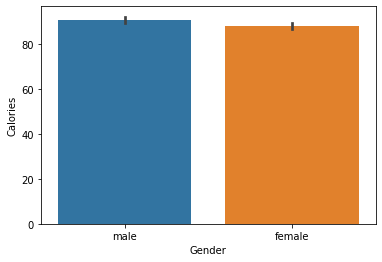

In [17]:
sns.barplot("Gender","Calories",data=df1)

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']


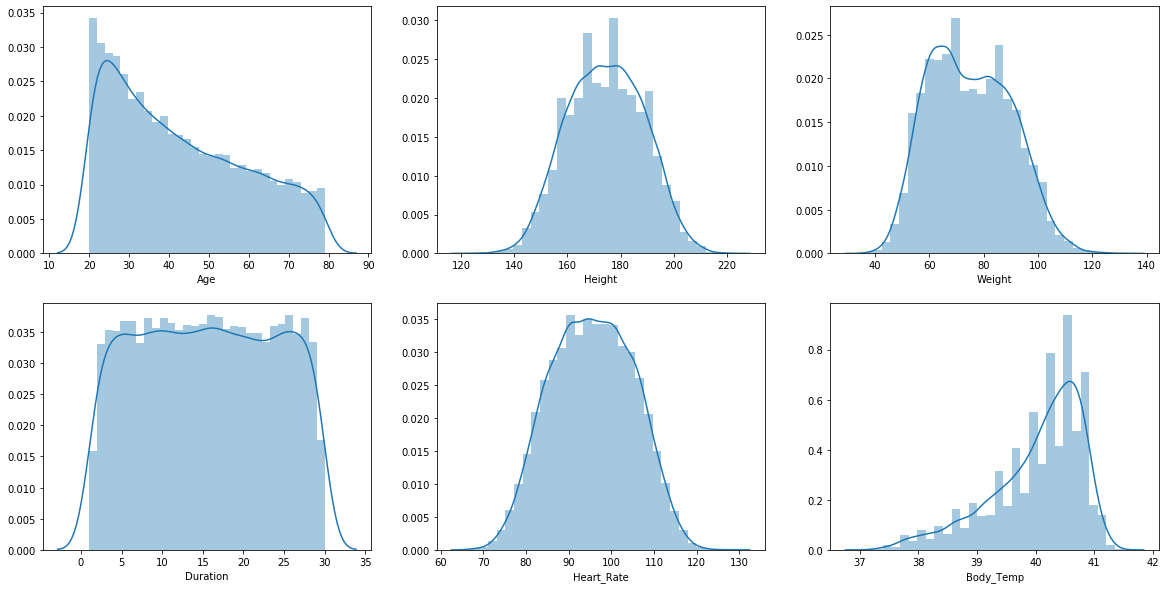

In [18]:
k = 1
numerical_features = [feature for feature in df1.columns if df1[feature].dtypes != 'O']
print(numerical_features)
plt.figure(figsize=(20,10))
for i in numerical_features[:-1]:
    plt.subplot(2,3,k)
    sns.distplot(df1[i],bins=30,kde=True)
    k += 1

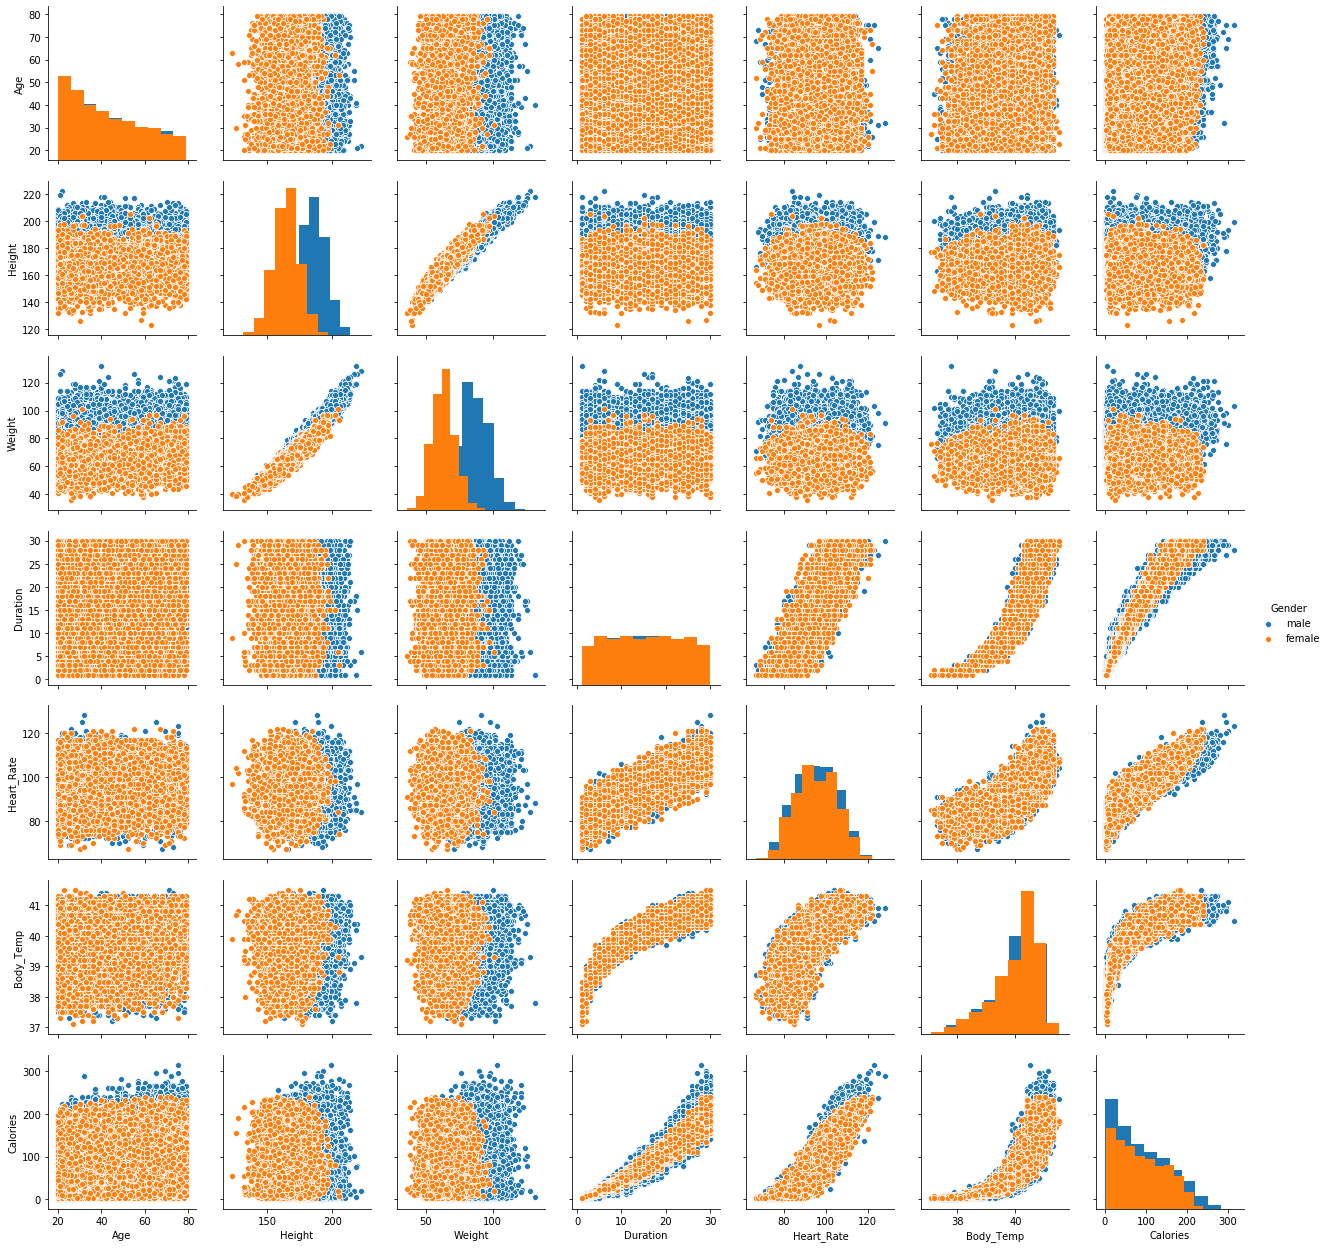

In [19]:
sns.pairplot(df1,diag_kind="hist",hue="Gender")

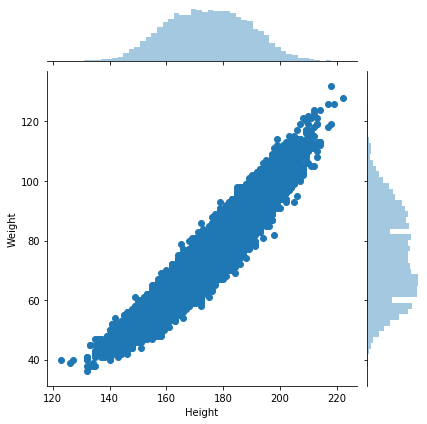

In [20]:
sns.jointplot("Height","Weight",data=df1,kind="scatter")

In [21]:
df1.groupby("Gender")["Weight"].mean()

Gender
female    63.274460
male      86.825702
Name: Weight, dtype: float64

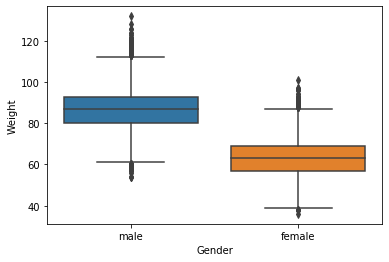

In [22]:
sns.boxplot("Gender","Weight",data=df1)

### converting categorical feature Gender to Numerical using one hot encoding

In [23]:
df1.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [24]:
df1["male"]=pd.get_dummies(df1["Gender"],drop_first=True)

In [25]:
df1.drop("Gender",axis=1,inplace=True)

In [26]:
df1.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,27,154.0,58.0,10.0,81.0,39.8,35.0,0


### applying regression algorithms without transforming and scaling features

In [27]:
df1.shape

(15000, 8)

In [28]:
X = df1.drop("Calories",axis=1)
Y = df1["Calories"]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)


In [30]:
print("training rows",len(X_train))
print("testing rows",len(X_test))

training rows 10500
testing rows 4500


In [31]:
mse = []
r2 = []

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [33]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_test,y_pred))
mse.append(mean_squared_error(y_test,y_pred))
r2.append(r2_score(y_test,y_pred))

mean squared error: 122.62584428590658
r2_score: 0.9680735617569364


In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
model1 = KNeighborsRegressor()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_test,y_pred))
mse.append(mean_squared_error(y_test,y_pred))
r2.append(r2_score(y_test,y_pred))

mean squared error: 53.65435555555556
r2_score: 0.9860307386335142


In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_test,y_pred))
mse.append(mean_squared_error(y_test,y_pred))
r2.append(r2_score(y_test,y_pred))

mean squared error: 28.46066666666667
r2_score: 0.9925900798320197


In [38]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [39]:
model3 = DecisionTreeRegressor()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_test,y_pred))
mse.append(mean_squared_error(y_test,y_pred))
r2.append(r2_score(y_test,y_pred))

mean squared error: 28.31577777777778
r2_score: 0.9926278025991098


In [40]:
model4 = AdaBoostRegressor()
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_test,y_pred))
mse.append(mean_squared_error(y_test,y_pred))
r2.append(r2_score(y_test,y_pred))

mean squared error: 140.11641573303896
r2_score: 0.9635197774189399


In [41]:
model5 = GradientBoostingRegressor()
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_test,y_pred))
mse.append(mean_squared_error(y_test,y_pred))
r2.append(r2_score(y_test,y_pred))

mean squared error: 12.329652617986707
r2_score: 0.9967898945352108


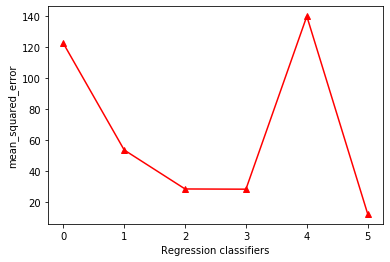

In [42]:
x = np.arange(6)
plt.plot(x,mse,'r^-')
plt.xlabel("Regression classifiers")
plt.ylabel("mean_squared_error")
plt.show()

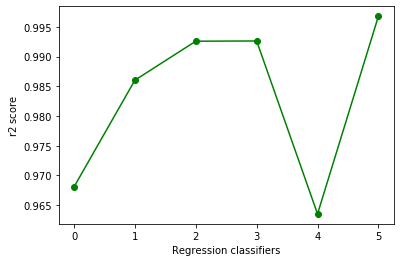

In [43]:
x = np.arange(6)
plt.plot(x,r2,'go-')
plt.xlabel("Regression classifiers")
plt.ylabel("r$2$ score")
plt.show()

### Transforming the skewed data
>we know that regression using numerical data assumes the features are normally distributed
>>checking which features are more deviated from normal distribution and transforming if found so.


## Q-Q plot

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
Age           15000 non-null int64
Height        15000 non-null float64
Weight        15000 non-null float64
Duration      15000 non-null float64
Heart_Rate    15000 non-null float64
Body_Temp     15000 non-null float64
Calories      15000 non-null float64
male          15000 non-null uint8
dtypes: float64(6), int64(1), uint8(1)
memory usage: 835.1 KB


In [45]:
numerical_features = df1.columns[:6]

In [46]:
import scipy.stats as stat
import pylab

In [47]:
def QQ_plot(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(df[feature],bins=30)
    plt.xlabel(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist="norm",plot=pylab)
    plt.show()

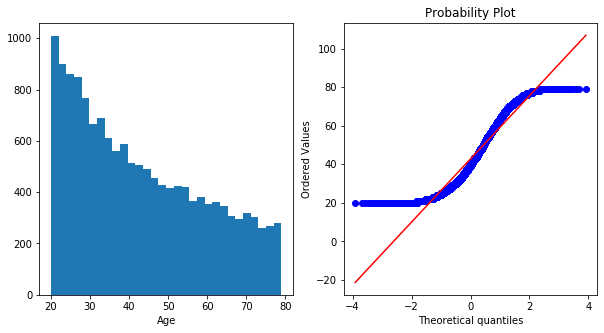

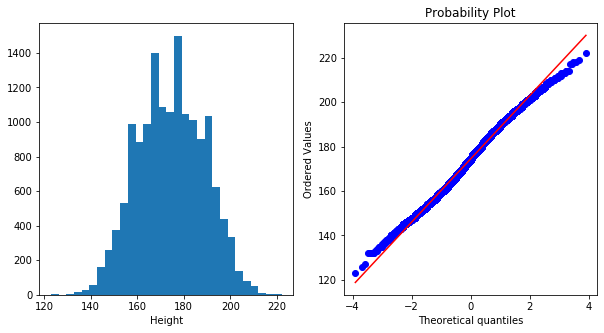

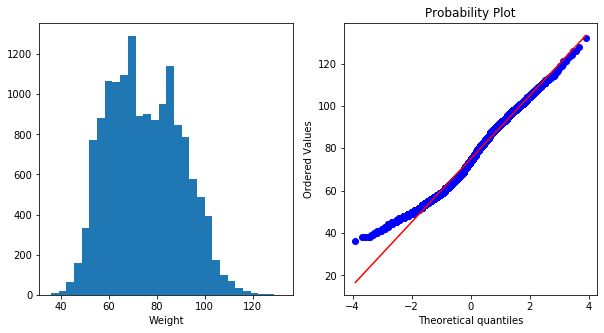

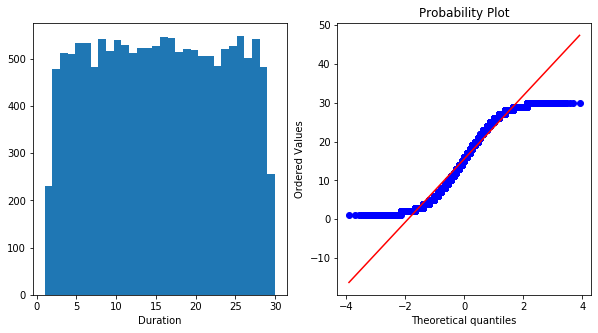

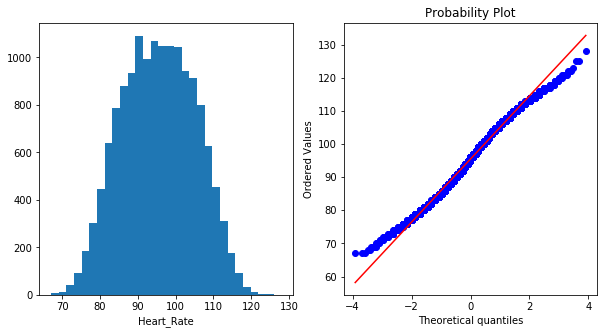

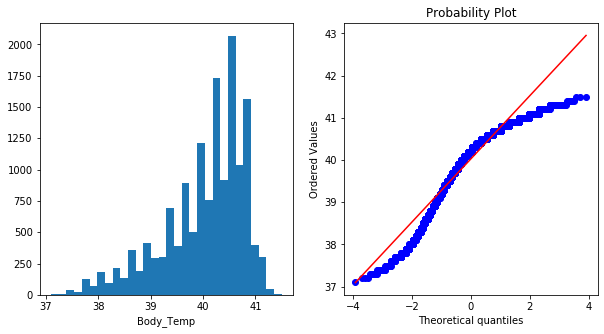

In [48]:

for feature in numerical_features:
    QQ_plot(df1,feature)
    

In [49]:
df1["Age_log"] = np.log(df1["Age"])

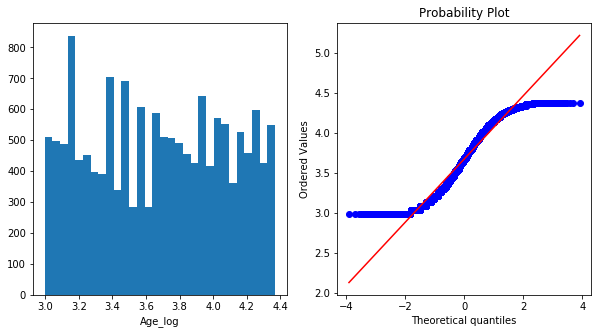

In [50]:
QQ_plot(df1,"Age_log")

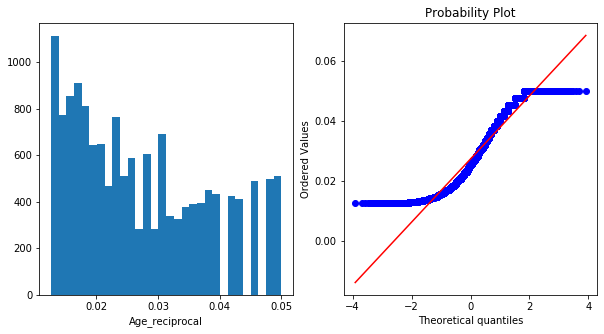

In [51]:
df1["Age_reciprocal"] = 1/df1["Age"]
QQ_plot(df1,"Age_reciprocal")

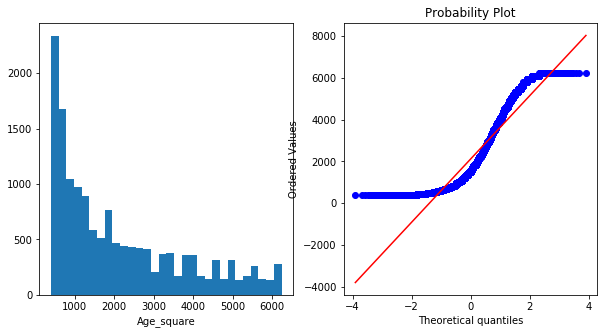

In [52]:
df1["Age_square"] = df1["Age"]**2
QQ_plot(df1,"Age_square")

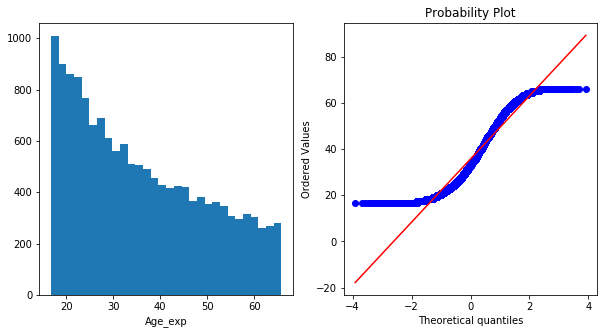

In [53]:
df1["Age_exp"] = df1["Age"]*(1/1.2)
QQ_plot(df1,"Age_exp")

In [54]:
df1["Age_boxcox"],parameter = stat.boxcox(df1["Age"])

In [55]:
parameter

0.010673243334461695

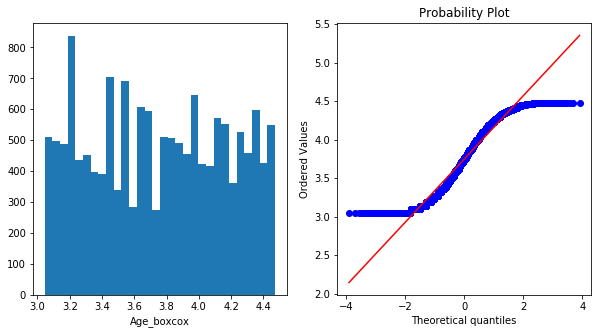

In [56]:
QQ_plot(df1,"Age_boxcox")

In [57]:
df1["Body_Temp_boxcox"],parameter = stat.boxcox(df1["Body_Temp"])

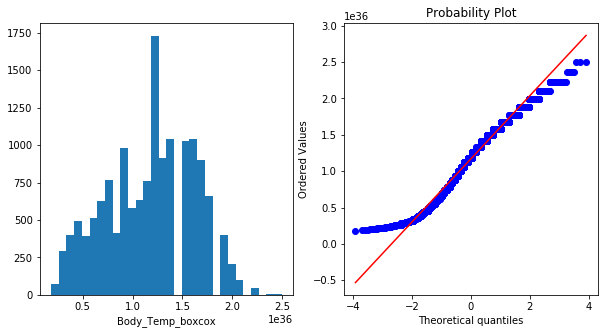

In [58]:
QQ_plot(df1,"Body_Temp_boxcox")

## what others did on this problem statement

In [59]:
exercise = pd.read_csv('exercise.csv')
calories = pd.read_csv('calories.csv')

In [60]:
#Learning 1
df = pd.merge(exercise,calories,on="User_ID")

In [61]:
df.corr()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


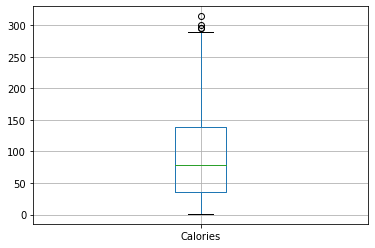

In [62]:
df.boxplot(column="Calories")

As we see from the above correlation matrix that calories burned and duration of exercise have higher correlation coefficient

# removing rows from dataset based on outliers of Calories

In [63]:
df = df[df["Calories"]<300]
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


[]

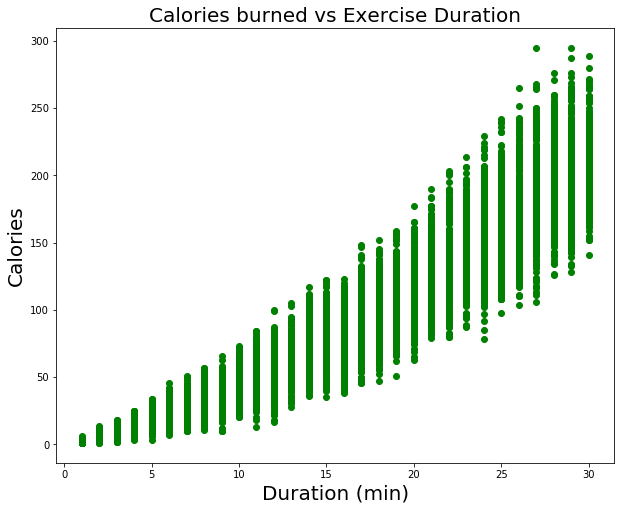

In [64]:
plt.figure(figsize=(10,8))
plt.plot(df["Duration"],df["Calories"],'go')
plt.xlabel("Duration (min)",size=20)
plt.ylabel("Calories",size=20)
plt.title("Calories burned vs Exercise Duration",size=20)
plt.plot()